# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #8
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, March 31st, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [5]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.stats import uniform
from scipy.stats import gamma
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

## Problem 1: Application of Data Augmentation

A plant nursery in Cambridge is exprimentally cross-breeding two types of hibiscus flowers: blue and pink. The goal is to create an exotic flower whose petals are pink with a ring of blue on each. 

There are four types of child plant that can result from this cross-breeding: 

  - Type 1: blue petals
  - Type 2: pink petals 
  - Type 3: purple petals
  - Type 4: pink petals with a blue ring on each (the desired effect). 

Out of 197 initial cross-breedings, the nursery obtained the following distribution over the four types of child plants: 
$$Y = (y_1, y_2, y_3, y_4) = (125, 18, 20, 34)$$
where $y_i$ represents the number of child plants that are of type $i$.

The nursery then consulted a famed Harvard plant geneticist, who informed them that the probability of obtaining each type of child plant in any single breeding experiment is as follows:
$$ \frac{\theta+2}{4}, \frac{1-\theta}{4}, \frac{1-\theta}{4}, \frac{\theta}{4}.$$
Unfortunately, the geneticist did not specify the quantity $\theta$.

Clearly, the nursery is interested in understanding how many cross-breeding they must perform, on average, in order to obtain a certain number of child plants with the exotic blue rings. To do this they must be able to compute $\theta$. 

The owners of the nursery, being top students in AM207, decided to model the experiment in hopes of discovering $\theta$ using the results from their 197 initial experiments. 

They chose to model the observed data using a multinomial model and thus calculated the likelihood to be:
$$ p(y  \vert  \theta) \propto (2+\theta)^{y_1} (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$

Being good Bayesians, they also imposed a prior on $\theta$, $\rm{Beta}(a, b)$.

Thus, the posterior is:
$$ p(\theta \vert  Y) \propto \left( 2+\theta \right)^{y_1} (1-\theta)^{y_2+y_3} \, \theta^{
y_4} \, \theta^{a-1} \, (1-\theta)^{b-1}. $$

If the nursery owners are able to sample from the posterior, they would be understand the distribution of $\theta$ and make appropriate estimates.

### Part A: Sampling using data augmentation

Realizing that it would be difficult to sample from the posterior directly and after being repeatedly frustrated by attempts of Metropolis-Hastings and Gibbs sampling for this model, the nursery owners decided to augment their model and hopefully obtain a friendlier looking distribution that allows for easy sampling.

They augment the data with a new variable $z$ such that:
$$z + (y_1 - z) = y_1.$$
That is, using $z$, we are breaking $y_1$, the number of type I child plants, into two subtypes. Let the probability of obtain the two subtype be $1/2$ and $\theta/4$, respectively. Now, we can interpret $y_1$ to be the total number of trials in a binomial trial. Thus, the new likelihood can be written as
$$ p(y, z  \vert  \theta) \propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$


Derived the joint posterior $p(\theta, z  \vert  y)$ and sample from it using Gibbs sampling.

Visualize the distribution of theta and, from this distribution, estimate the probability of obtaining a type 4 child plant (with the blue rings) in any cross-breeding experiment.

**Solutions**

In the first model (with out the augmentation with the latent variable $z$), where we have four possible outcomes each with some probability, we are setting up the observed counts of each of the four outcomes (the $y_i$'s) as a multinomial trial. Thus, the likelihood is just, up to a normalizing constant, the product of the probability of the each outcome raised to the power of how many times that particular outcome has occured (the count $y_i$),
$$ 
p(y  \vert  \theta) \propto (2+\theta)^{y_1} (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$
Note that the normalizing constant for this multinomial pdf is a term involving only the counts, the $y_i$'s. 

Now, when we introduce a latent var $Z$, this is essentially breaking the first outcome into two separate outcomes. To put it simply, we now have ***five*** outcomes instead of four. We still set up the likelihood as a multinomial trial (now with five categories instead of four) and so the likelihood is still proprotional to the product of the probability of the each outcome raised to the power of the count of that outcome,

$$ p(y, z  \vert  \theta) \propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$

So where did the $\binom{y_{1}}{z}$ come from? Well, when we write out the normalizing constant for the new multinomial model with five categories, some parts of this constants will involve $z$ and $y_1$, since $z$ is not a constant (we'll be sampling from it later) we can't drop these parts of the normalizing constant. If you keep the parts of the normalizing constant involving $z$ (and a bit extra) then you'll get the coefficient $\binom{y_{1}}{z}$. Rather than being confounding, this extra coefficient will help us recast our conditionals into simpler forms.

Now, to get the joint distribution $$ p(y, z, \theta)$$, we multiply the likelihood by the prior
$$ p(y, z  \vert  \theta) \propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4} \theta^{a-1} (1-\theta)^{b-1}
$$

From the joint, we can obtain the following conditionals,

$$
p(z | \theta, y)\propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z} 
$$

and 

$$
p(\theta | z, y)\propto \left(\frac{\theta}{4} \right )^{z}(1-\theta)^{y_2+y_3}  \, \theta^{y_4} \theta^{a-1} (1-\theta)^{b-1} \propto (1-\theta)^{y_2+y_3 + b - 1}  \, \theta^{y_4 + z + a -1}
$$

Observe that $p(\theta | z, y)$ looks like a beta pdf! In fact, $p(\theta | z, y)\propto  Beta(\theta; y_4 + z + a -1, y_2+y_3 + b - 1)$.

Observe also that $p(z | \theta, y)$ looks like a binomial pdf! Except that $\frac{1}{2} + \frac{\theta}{4} = \frac{2 + \theta}{4}$ is not equal to 1 (in a binomial pdf, the bases of the exponential factors express the probabilities of success and failure in a Bernoulli trail and thus need to sum to 1). We see that we need to renormalize. That is, multiply the expression for $p(z | \theta, y)$ by $\frac{[4/(2 + \theta)]^{(y_1 - z) + z}}{[4/(2 + \theta)]^{y_1}}$ and get

$$
p(z | \theta, y)\propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z} \frac{[4/(2 + \theta)]^{(y_1 - z) + z}}{[4/(2 + \theta)]^{y_1}}= \left(\frac{2 + \theta}{4}\right)^{y_1} \binom{y_{1}}{z} \left (\frac{2}{2 + \theta} \right )^{y_1-z} \left(\frac{\theta}{2 + \theta} \right )^{z}.
$$

But again $\left(\frac{2 + \theta}{4}\right)^{y_1}$ is constant with respect to $z$, so when we're sampling $z$ we can just drop this factor. That is, we just have

$$
p(z | \theta, y)\propto  \binom{y_{1}}{z} \left (\frac{2}{2 + \theta} \right )^{y_1-z} \left(\frac{\theta}{2 + \theta} \right )^{z}
$$

and the above is a binomial distribution $Bin\left(y_1, \frac{\theta}{2 + \theta} \right)$.


Now that we have our two full conditional, our Gibbs sampler will perform the following steps iteratively:

1. sample $\theta | z, y \sim Beta(y_4 + z + a -1, y_2+y_3 + b - 1)$
2. sample $z | \theta, y \sim Bin\left(y_1, \frac{\theta}{2 + \theta} \right )$.

In [15]:
def gibbs(y, a, b, z_init, theta_init, iters, burn, thin=1):
    #initialization 
    z = z_init
    thetas = [theta_init]
    
    for i in range(iters):
        if i % 1000 == 0:
            print i
            
        #draw z
        z = np.random.binomial(y[0], thetas[-1] / (2 + thetas[-1]))
        
        #draw theta
        theta = np.random.beta(y[3] + z + a - 1, y[1] + y[2] + b - 1)
        thetas.append(theta)
        
    return np.array(thetas[int(burn * iters)::thin])

In [16]:
#Initialize all parameters
z_init = 0
theta_init = 0.1
y = (125,18,20,34)
a = 1
b = 1

#Sample 100,000 samples with burn-in of 20% and thinning of 2
iters = 5000
thin = 2
burn = 0.2
thetas = gibbs(y, a, b, z_init, theta_init, iters, burn, thin=thin)

0
1000
2000
3000
4000


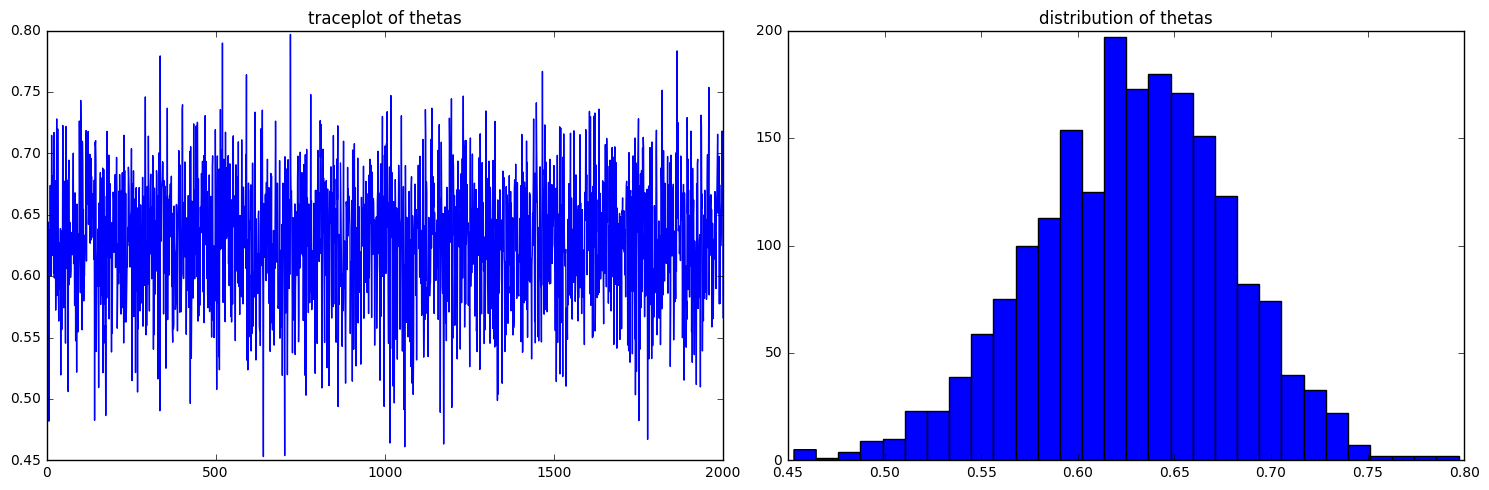

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(range(len(thetas)), thetas)
ax[0].set_title('traceplot of thetas')
ax[1].hist(thetas, bins=30)
ax[1].set_title('distribution of thetas')
plt.tight_layout()
plt.show()

In [26]:
print 'posterior mean estimate of theta: ', np.mean(thetas)

posterior mean estimate of theta:  0.627331725657


Using our model, we estimate theta to be 0.627. Thus, the probability of obtaining a child plant of type 4 is:

In [27]:
print 'the probability of child plant of type 4: ', np.mean(thetas) / 4

the probability of child plant of type 4:  0.156832931414


That is, we have about a 16% chance of getting the desired type of child plant in each cross-breeding experiment.